In [301]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Dataset

In [302]:
data = pd.read_csv("/content/user2_data.csv",index_col = 0)
data.head(-3)

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
ttime,,,,,,,,,
2022-07-18 15:39:58,0.83,0.00,0.00,0.0,7463.0,6547.0,23.02,90.57,92849.25
2022-07-18 15:44:55,1.39,0.00,0.00,0.0,7576.0,10249.0,23.47,88.37,92848.31
2022-07-18 15:49:55,1.95,0.00,0.00,0.0,7576.0,12636.0,23.64,85.26,92844.82
2022-07-18 15:54:55,2.51,0.00,0.00,0.0,7463.0,8318.0,23.62,85.93,92834.94
2022-07-18 15:59:56,0.55,2.51,2.51,0.0,7463.0,4149.0,23.82,86.06,92815.25
...,...,...,...,...,...,...,...,...,...
2023-03-10 07:35:16,1.11,1.11,27.93,0.0,325.0,2911.0,19.53,44.22,93480.82
2023-03-10 08:03:13,0.55,1.11,27.38,0.8,325.0,4321.0,22.48,39.49,93513.03
2023-03-10 08:31:12,1.11,1.11,27.38,1.6,326.0,5425.0,24.70,35.81,93546.17


## **Insights**

In [303]:
data.describe()

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
count,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000
mean,1.585495,2.581223,59.172185,0.729346,4339.095656,2891.423039,22.625972,78.329035,93154.619405
std,1.045641,1.288723,28.166706,1.795355,3077.733911,4277.275782,4.666760,24.007034,290.963485
min,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,8.610000,13.320000,92352.450000
25%,0.550000,1.670000,36.880000,0.000000,465.250000,2.000000,20.000000,61.690000,92976.272500
50%,1.110000,2.230000,51.400000,0.000000,6410.000000,165.500000,21.430000,88.220000,93152.930000
75%,2.230000,3.350000,77.110000,0.000000,7042.000000,5275.000000,26.110000,100.000000,93350.997500
max,6.700000,6.700000,153.660000,18.390000,7937.000000,19767.000000,36.880000,100.000000,94042.780000


### *Data Shape*

In [304]:

data.shape

(20166, 9)

*Just some pandas practice*

In [305]:
temp = list(data.apply(np.mean,axis = 0))
temp2 = list(data.apply(np.median,axis = 0))

mnm = pd.DataFrame([temp,temp2],columns=data.columns,index=["mean","median"])
mnm

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
mean,1.585495,2.581223,59.172185,0.729346,4339.095656,2891.423039,22.625972,78.329035,93154.619405
median,1.110000,2.230000,51.400000,0.000000,6410.000000,165.500000,21.430000,88.220000,93152.930000


>## Plotting Practice

In [306]:
import matplotlib.pyplot as plt

In [307]:
data.columns

Index(['pm1', 'pm2', 'pm3', 'am', 'sm', 'lum', 'temp', 'humd', 'pres'], dtype='object')

In [308]:
# plt.bar(data["am"],data["sm"])
# plt.xlabel("am")
# plt.ylabel("pred..")
# plt.title("am comp")
# plt.show()

In [309]:
# plt.scatter(data["lum"],data["sm"])
# plt.show()

In [310]:
# plt.hist(data["sm"],bins = 5,color = "red",orientation = "horizontal",cumulative =1)
# plt.ylabel("sm")
# plt.xlabel("Applications")
# plt.show()

In [311]:
# gr = data.groupby("st")["sm"].mean()
# list(gr)

In [312]:
# plt.bar(gr.index,list(gr))
# plt.xlabel("st")
# plt.xticks([0,1])
# plt.ylabel("sm")
# plt.title("Do research matter?")
# plt.show()

# Preparing data for training

In [313]:
X = data.iloc[:,:-1]
y = data[["sm"]]
y

,sm
ttime,
2022-07-18 15:39:58,7463.0
2022-07-18 15:44:55,7576.0
2022-07-18 15:49:55,7576.0
2022-07-18 15:54:55,7463.0
2022-07-18 15:59:56,7463.0
...,...
2023-03-10 08:59:16,327.0
2023-03-10 09:27:12,327.0
2023-03-10 09:55:12,327.0


## Standardize the data

In [314]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(20166, 8)

### Cost Function

In [315]:
def cost_function(X,y,B):
    m = X.shape[0]
    J = np.sum((np.dot(X,B)-y)**2)/(2*m)
    return J

## Gradient Descent

In [316]:
def gradient_decent(X,y,B,iterations,alpha=0.001):
    history = [0]*iterations
    m = X.shape[0]
    for iteration in range(iterations):
        h = np.dot(X,B)
        loss = h - y
        der = np.dot(loss,X)/m
        B = B - alpha*der
        cost = cost_function(X,y,B)
        print(f"Iteration : {iteration}; Cost : {cost}")
        history[iteration] = cost
    return B,history
        

### Adding Intercept

In [317]:
X = np.c_[np.ones(len(X),dtype='int64'),X] 


# Train-Test Split

In [318]:
m = int(X.shape[0]-(X.shape[0]*0.024))
X_train = X[:m,:]

y_train = y.iloc[:m,:].to_numpy()
y_train= y_train.flatten()

print(X_train)
print(y_train)

X_test = X[m:,:]
y_test = y[m:]

[[ 1.         -0.7225369  -2.00298149 ...  0.85467194  0.084435
   0.50990343]
 [ 1.         -0.1869669  -2.00298149 ...  1.72019757  0.18086404
   0.41826135]
 [ 1.          0.3486031  -2.00298149 ...  2.27827689  0.21729278
   0.28871277]
 ...
 [ 1.         -0.9903219  -1.14164206 ... -0.67507797 -0.66985438
  -1.79364523]
 [ 1.         -0.4547519  -1.14164206 ... -0.67484417 -0.76628342
  -1.78614724]
 [ 1.          0.0808181  -1.14164206 ... -0.67507797 -0.91628415
  -1.731162  ]]
[7463. 7576. 7576. ...  331.  331.  330.]


In [319]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(19682, 9)
(19682,)
(484, 9)
(484, 1)


# Model Training

In [320]:
B = np.zeros(X_train.shape[1])
alpha = 0.005
iteratn = 18000
updatedB,hist = gradient_decent(X_train,y_train,B,iteratn,alpha)

Streaming output truncated to the last 5000 lines.
Iteration : 13000; Cost : 0.06641608548996622
Iteration : 13001; Cost : 0.06634150554963389
Iteration : 13002; Cost : 0.06626700951730596
Iteration : 13003; Cost : 0.06619259729845041
Iteration : 13004; Cost : 0.06611826879865888
Iteration : 13005; Cost : 0.06604402392361583
Iteration : 13006; Cost : 0.06596986257911487
Iteration : 13007; Cost : 0.06589578467106032
Iteration : 13008; Cost : 0.06582179010547141
Iteration : 13009; Cost : 0.06574787878843734
Iteration : 13010; Cost : 0.06567405062618709
Iteration : 13011; Cost : 0.06560030552502666
Iteration : 13012; Cost : 0.06552664339145295
Iteration : 13013; Cost : 0.06545306413192838
Iteration : 13014; Cost : 0.06537956765310908
Iteration : 13015; Cost : 0.06530615386174238
Iteration : 13016; Cost : 0.06523282266472631
Iteration : 13017; Cost : 0.06515957396894957
Iteration : 13018; Cost : 0.06508640768151712
Iteration : 13019; Cost : 0.06501332370957667
Iteration : 13020; Cost : 0.0

## Visualizing the loss over iterations

<function matplotlib.pyplot.show(close=None, block=None)>

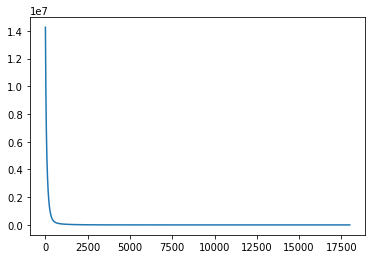

In [321]:
epochs = [x for x in range(1,18001)]
plt.plot(epochs,hist)
plt.show

# Predictions

In [322]:
def pred(x_test, newB):
    return x_test.dot(newB)

In [323]:
y_pred = pred(X_test,updatedB)


In [324]:
y_pred

array([329.94366288, 329.93977954, 329.93049772, 329.93438682,
       328.93489528, 328.94181998, 328.94105121, 327.94245286,
       327.93972764, 327.94586995, 327.96265   , 328.99305193,
       328.99108992, 328.98431321, 330.00099113, 329.99960814,
       329.98903313, 329.99549624, 330.01079174, 331.00632333,
       330.00960278, 331.01162266, 331.00954305, 330.01256659,
       330.02699809, 330.00222766, 331.0230532 , 331.03104055,
       331.01112338, 331.01832498, 330.00355357, 329.99559751,
       329.99016523, 329.97958712, 329.98104727, 329.97224654,
       329.9697367 , 329.96472796, 330.96503448, 330.9634568 ,
       330.97503375, 330.9692557 , 330.96238712, 330.9580745 ,
       330.95643906, 330.95754619, 330.95342261, 330.94934247,
       330.95000253, 330.95081655, 330.94956279, 330.95866171,
       329.95509342, 329.94629428, 329.94345325, 329.94412672,
       328.94339276, 328.94456528, 328.94892478, 328.95070186,
       328.95709664, 327.95526137, 327.94669625, 327.94

In [325]:
import sklearn.metrics as sm

# Calculating R2 Score

In [326]:
print(sm.r2_score(y_test,y_pred))
print(y_pred.shape,y_test.shape)

y_test

0.9993026728907387
(484,) (484, 1)


,sm
ttime,
2023-03-01 03:23:41,330.0
2023-03-01 03:50:41,330.0
2023-03-01 04:17:42,330.0
2023-03-01 04:44:42,330.0
2023-03-01 05:11:42,329.0
...,...
2023-03-10 08:59:16,327.0
2023-03-10 09:27:12,327.0
2023-03-10 09:55:12,327.0


In [327]:
vals = y_test.assign(predictions = y_pred)


In [328]:
vals

,sm,predictions
ttime,,
2023-03-01 03:23:41,330.0,329.943663
2023-03-01 03:50:41,330.0,329.939780
2023-03-01 04:17:42,330.0,329.930498
2023-03-01 04:44:42,330.0,329.934387
2023-03-01 05:11:42,329.0,328.934895
...,...,...
2023-03-10 08:59:16,327.0,326.980632
2023-03-10 09:27:12,327.0,326.985471
2023-03-10 09:55:12,327.0,326.983426


In [329]:
print(y_test.shape)
print(y_pred.shape)
y_test=y_test.to_numpy()
mse=np.square(np.subtract(y_test,y_pred))
print(mse.shape)


(484, 1)
(484,)
(484, 484)


In [330]:
# import matplotlib.pyplot as plt
# x1=list(range(3869))
# y1=list(mse)
# plt.plot(x1[:300],y1[:300])
# plt.show()

In [331]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.032054612162071075
Mean Square Error: 0.0013733256346747352
Root Mean Square Error: 0.037058408420690914


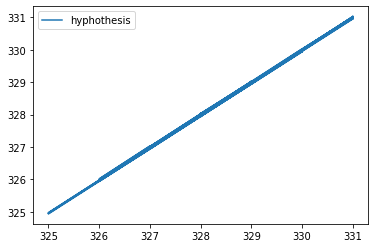

In [332]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred,label='hyphothesis')
plt.legend(loc='upper left')